/tmp/ipykernel_4112554/3482890586.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


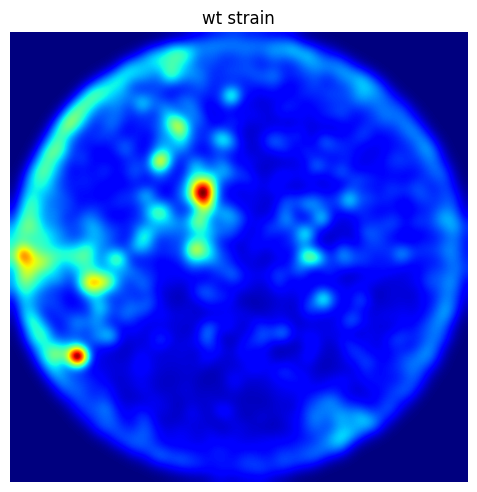

In [21]:
import os
import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

from src import settings
from src.utils import fileio, data_utils

def plot_2d_hiostogram(x_values_filtered, y_values_filtered, title):
    heatmap, xedges, yedges = np.histogram2d(x_values_filtered, y_values_filtered, bins=1000)
    heatmap = gaussian_filter(heatmap, sigma=16)
    # Plot the heatmap

    plt.axis('off')
    plt.imshow(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=cm.jet)
    # plt.colorbar(label='Count')
    # plt.xlabel('X values')
    # plt.ylabel('Y values')

    # fig.set_size_inches(7, 7)
    plt.tight_layout()
    # plt.title(f'{settings.TREATMENT}') #with gaussian filter
    plt.title(title) #with gaussian filter
    plt.show()

TREATMENT="wt"
# INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "0_0_preproc_data")
INPUT_DIR = "/home/milky/drosophila-SNA/data/processed/"+TREATMENT+"/0_0_preproc_data"

trials = fileio.load_multiple_folders(INPUT_DIR)

pos_x_treatment = np.array([])
pos_y_treatment = np.array([])
for group_name, group_path in trials.items():  

    if group_name == "wt_1":
        continue

    pos_x_group = np.array([])
    pos_y_group = np.array([])
    
    fly_dict=fileio.load_files_from_folder(group_path)
    for fly_name, fly_path in fly_dict.items():  
        df = pd.read_csv(fly_path, usecols=['pos x', 'pos y'])
        pos_x = df["pos x"].to_numpy()
        pos_y = df["pos y"].to_numpy()

        pos_x_group = np.concatenate((pos_x_group, pos_x))
        pos_y_group = np.concatenate((pos_y_group, pos_y))

        pos_x_treatment = np.concatenate((pos_x_treatment, pos_x))
        pos_y_treatment = np.concatenate((pos_y_treatment, pos_y))
    
    pos_x_group = pos_x_group[~np.isnan(pos_x_group)]
    pos_y_group = pos_y_group[~np.isnan(pos_y_group)]


x_values_filtered = pos_x_treatment[~np.isnan(pos_x_treatment)]
y_values_filtered = pos_y_treatment[~np.isnan(pos_y_treatment)]

title=TREATMENT+" strain"
plot_2d_hiostogram(x_values_filtered, y_values_filtered, title)


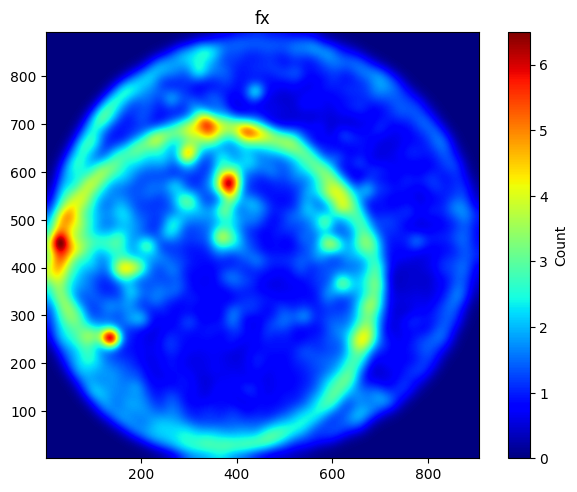

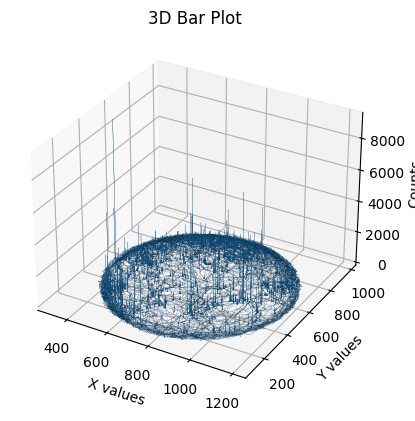

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_values = x_values_filtered
y_values = y_values_filtered

counts = {}
for x, y in zip(x_values, y_values):
    coordinate_pair = (x, y)
    if coordinate_pair in counts:
        counts[coordinate_pair] += 1
    else:
        counts[coordinate_pair] = 1

unique_coordinates = list(counts.keys())
counts_values = list(counts.values())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = zip(*unique_coordinates)
ax.bar3d(x, y, np.zeros_like(counts_values), 0.8, 0.8, counts_values, shade=True)

ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Counts')
ax.set_title('3D Bar Plot')

plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_values = pos_x_group
y_values = pos_y_group

# Compute counts for each coordinate pair
counts = {}
for x, y in zip(x_values, y_values):
    coordinate_pair = (x, y)
    if coordinate_pair in counts:
        counts[coordinate_pair] += 1
    else:
        counts[coordinate_pair] = 1

# Extract the unique x, y pairs and their counts
unique_coordinates = list(counts.keys())
counts_values = np.array(list(counts.values()))

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cm.jet(counts_values / np.max(counts_values))

# Plot the bars with heights based on counts
x, y = zip(*unique_coordinates)
z = np.zeros_like(counts_values)
dx = dy = 0.8
dz = counts_values

for i in range(len(unique_coordinates)):
    ax.bar3d(x[i], y[i], z[i], dx, dy, dz[i], color=colors[i])

# Set labels and title
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Counts')
ax.set_title('3D Bar Plot')
# Show the plot
plt.show()


In [40]:
import os
import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
# from scipy.ndimage.filters import gaussian_filter

from src import settings
from src.utils import fileio, data_utils

TREATMENT="wt"
# INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "0_0_preproc_data")
INPUT_DIR = "/home/milky/drosophila-SNA/data/results/"+ TREATMENT + "/distances_traveled"

trials =fileio.load_files_from_folder(INPUT_DIR)

tot = np.array([])
for fly_name, fly_path in trials.items():  
    df = pd.read_csv(fly_path, index_col=0)

    dist = df.sum(axis=0).round()
    dist = dist.to_numpy()

    tot = np.concatenate((tot, dist))


TREATMENT="fx"
# INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "0_0_preproc_data")
INPUT_DIR = "/home/milky/drosophila-SNA/data/results/"+ TREATMENT + "/distances_traveled"

trials =fileio.load_files_from_folder(INPUT_DIR)

tot_fx = np.array([])
for fly_name, fly_path in trials.items():  
    df = pd.read_csv(fly_path, index_col=0)

    dist = df.sum(axis=0).round()
    dist = dist.to_numpy()

    tot_fx = np.concatenate((tot_fx, dist))



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


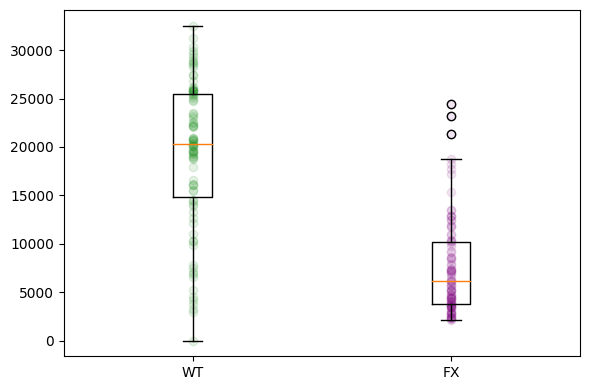

In [73]:
from statistics import mean, stdev


fx_measures = tot_fx
wt_measures = tot

my_dict = {"wt":wt_measures, "fx":fx_measures}

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.boxplot(my_dict.values())

x_labels = ["WT", "FX"]
scatter_colors = ['green', 'purple']  # Color for each scatter plot
scatter_alpha = 0.10

for i, (key, value) in enumerate(my_dict.items()):
    x = [i + 1] * len(value)
    ax.scatter(x, value, color=scatter_colors[i], alpha=scatter_alpha)
    ax.set_ylabel("")

ax.set_xticklabels(x_labels, rotation=0)
ax.set_xticklabels(x_labels, rotation=0) #, rotation=90

names, vals, xs = [], [] ,[]

# plt.xlabel("Populations")
# plt.ylabel("Value")

# plt.title(graph_title)
# plt.legend()
plt.tight_layout()
plt.ylabel('')
plt.savefig("box.eps", dpi=350)
plt.show()
plt.cla()
plt.clf()
plt.close()


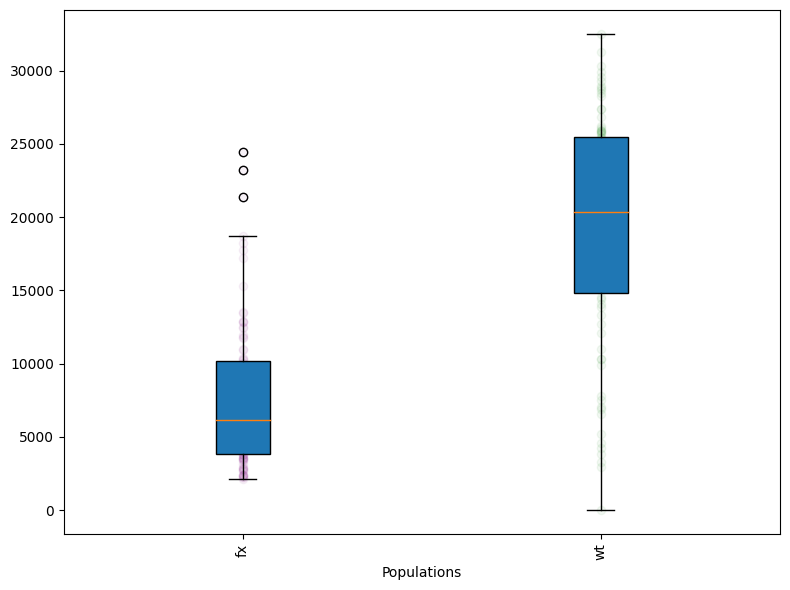

In [63]:
import matplotlib.pyplot as plt

def get_x_labels(my_dict_keys):
    my_dict_keys = list(my_dict_keys)
    coc_count = 1
    ctrl_count = 1
    
    new_values = []
    for item in my_dict_keys:
        if item.startswith('CTRL'):
            new_values.append('CTRL_'+str(ctrl_count))
            ctrl_count += 1
            
        else:
            new_values.append('COC_'+str(coc_count))
            coc_count += 1
            
    return my_dict_keys

fx_measures = tot_fx
wt_measures = tot

dictionary = {"fx": fx_measures, "wt": wt_measures}

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

# Boxplot
boxplot_data = list(dictionary.values())
boxplot_colors = ['purple', 'green']  # Color for each boxplot
boxplot_labels = get_x_labels(dictionary.keys())

ax.boxplot(boxplot_data, patch_artist=True, labels=boxplot_labels)

# Scatter plot
scatter_colors = ['purple', 'green']  # Color for each scatter plot
scatter_alpha = 0.05

for i, (key, value) in enumerate(dictionary.items()):
    x = [i + 1] * len(value)
    ax.scatter(x, value, color=scatter_colors[i], alpha=scatter_alpha)

# Set x-axis tick labels
ax.set_xticklabels(boxplot_labels, rotation=90)

plt.xlabel("Populations")
ax.set_ylabel('')

plt.tight_layout()
plt.show()

